## Bernstein-Vazirani Implementation 
Unity ID: smanthe \
Name: Sai Krishna Teja Varma Manthena

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute, BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

In [2]:
s = "100111"
n = len(s)

In [3]:
def oracle(circ, input, output, num, hidden_string,classicalreg):
    #Apply Walsh-Haddamard
    circ.h(input)

    #|-> on output
    circ.x(output)
    circ.h(num)

    for pos,bit in enumerate(reversed(hidden_string)):
        if bit == '1':
            circ.cx(pos,num)
            
    #adding a barrier
    circ.barrier()

    #Walsh-hadamard on input bits
    circ.h(input)

    circ.measure(input,classicalreg)

In [4]:
qin = QuantumRegister(n)
qout = QuantumRegister(1)
c = ClassicalRegister(n)
qc = QuantumCircuit(qin,qout,c)

In [5]:
#Generate the circuit
oracle(qc,qin,qout,n,s,c)

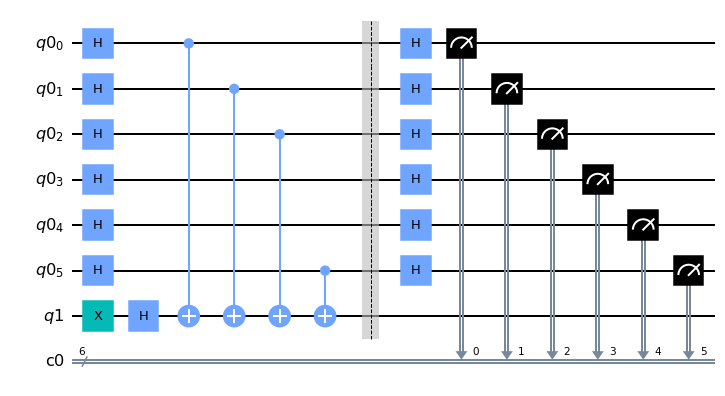

In [6]:
#draw circuit
qc.draw(output="mpl")

In [7]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend) 
result = job.result()
print(result.get_statevector())

[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0

In [8]:
print(result.get_counts())

{'100111': 1}


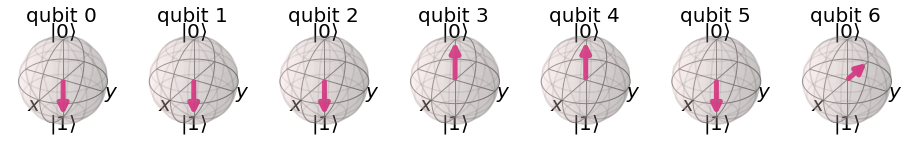

In [9]:
plot_bloch_multivector(result.get_statevector())

{'100111': 1}


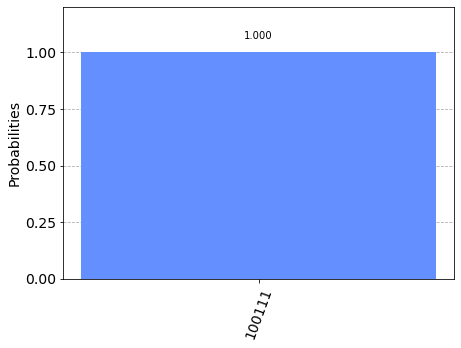

In [10]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend,shots= 1)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

In [11]:
s1 = "01001"
n1 = len(s1)

In [12]:
qin1 = QuantumRegister(n1)
qout1 = QuantumRegister(1)
c1 = ClassicalRegister(n1)
qc1 = QuantumCircuit(qin1,qout1,c1)

In [13]:
#Generate the circuit
oracle(qc1,qin1,qout1,n1,s1,c1)

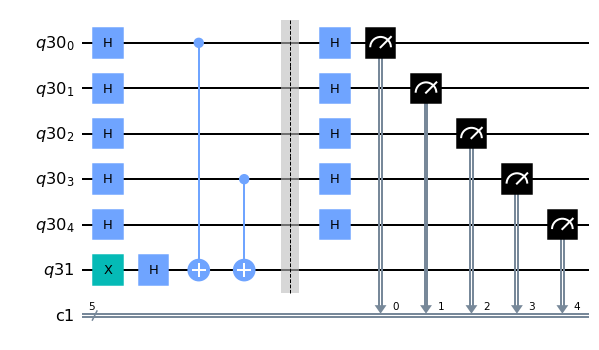

In [14]:
qc1.draw(output="mpl")

In [15]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc1, backend) 
result = job.result()
print(result.get_statevector())

[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.70710678-1.73191211e-16j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0

In [16]:
print(result.get_counts())

{'01001': 1}


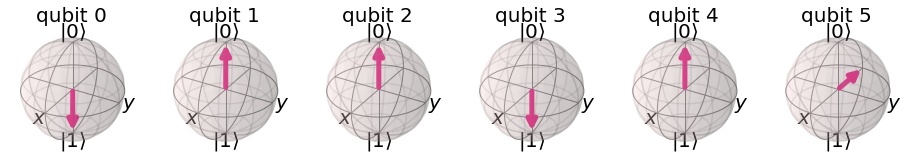

In [17]:
plot_bloch_multivector(result.get_statevector())

{'01001': 1}


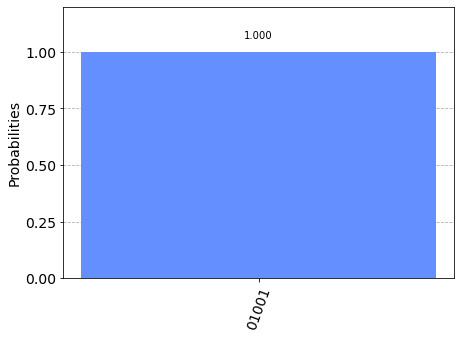

In [18]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc1, backend, shots=1)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())